# Syed Hamza Ali
# Segment Objects from background

# Thresholding
## This notebook outlines the concepts behind Thresholding used in Image processing

## NOTE: The cv2 image show function does not work in colab and produces very alrge windows in Visual Studio Code, therefore it is commented.

Thresholding is the **binarization** of an image
- Convert a grayscale image to a binary image, where the pixels are either 0 or 255

A **simple thresholding example** would be as follows:
- selecting a pixel value p
- Setting all pixel intensities less than p to zero
- Setting all pixel values greater than p to 255

In this way, we are able to create a **binary representation** of the image

Normally, we use thresholding to focus on objects or **areas of particular interest** in an image

### Types of Thresholding
- Simple Thresholding
- Adaptive Thresholding
- Otsu and Riddler-Calvard Thresholding
- Watershed

## SIMPLE THRESHOLDING

Applying simple thresholding methods requires **human intervention**
- Specify a threshold value **T**
- All pixel intensities **below** T are set to **0**
- All pixel intensities **greater** than T are set to **255**

**Inverse Binarization**

- Setting all pixels **below** T to **255**
- Setting all pixel intensities **greater** than T to **0**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Threshold the image
- Display the image

#### Import the necessary libraries

In [1]:
import cv2
import numpy as np

#### Load the image

In [2]:
image = cv2.imread("Task6_img.jpg")

#### Convert the image into grayscale

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [4]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.threshold( )**
    - image
    - threshold value **T** (manual setting)
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Thresholding method
        - **THRESH_BINARY**
            - Pixel values greater than T are set to maximum value M
    - Returns
        - T (manually set)
        - thresholded image

In [5]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)

#### Display the thresholded image

In [7]:
#cv2.imshow("Thresholding of Image", np.hstack([gray, blurred, thresh]))
#cv2.waitKey(0)

### Homework:
- Test whether using Blurring before Thresholding helps or not
    - Take more images
    - Run results with Blurring
    - Run results without Blurring
    - Compare and study the effects of blurring
- Also, try the other Thresholding methods
    - cv2.THRESH_TRUNC
    - cv2.THRESH_TOZERO
    - cv2.THRESH_TOZERO_INV

### Inverse Thresholding

In [8]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

In [9]:
#cv2.imshow("Thresholding of Images", np.hstack([gray, blurred, thresh, threshInv]))
#cv2.waitKey(0)

### Extract the foreground

In [10]:
foreground = cv2.bitwise_and(image, image, mask = threshInv)

In [11]:
#cv2.imshow("Thresholding of Images", np.hstack([gray, blurred, thresh, threshInv]))
#cv2.imshow("Foreground extraction", np.hstack([image, foreground]))
#cv2.waitKey(0)

## ADAPTIVE THRESHOLDING

Drawbacks of Previous method
- Manually supply Threshold Value T
- Requires lots of experiments with different T

**Solution**: Adaptive Thresholding

Consider **small neighbors** of pixels and then find an **optimal threshold value** T for each neighbor

Useful
- High ranges of pixel intensities in the image
- Optimal value of T may change for different parts of the image

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Adaptive Threshold the image
- Display the image

#### Import the libraries

In [12]:
import cv2
import numpy as np

#### Load the image

In [13]:
image = cv2.imread("Task6_img.jpg")

#### Convert the image into grayscale

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [15]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.adaptiveThreshold( )**
    - image
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Method to compute the thresholding
        - **ADAPTIVE_THRESH_MEAN_C**
            - Compute the mean of the neighborhood of pixels and treat it as T
        - **ADAPTIVE_THRESH_GAUSSIAN_C**
            - Compute the Weighted mean of the neighborhood of pixels and treat it as T
    - Thresholding Method
        - **THRESH_BINARY_INV**
            - If any pixel greater than T in the neighborhood should be set to 255
            - If any pixel less than T, set to 0
    - Neighborhood size
        - Smaller square region for consideration to compute threshold
    - C
        - Integer that is subtracted from the mean allowing us to fine-tune our thresholding
    - Returns
        - T (manually set)
        - thresholded image

In [16]:
thresh = cv2.adaptiveThreshold(blurred,
                               255,
                               cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV,
                               11,
                               4
)

#### Display the Thresholded image

In [17]:
#cv2.imshow("Adaptive Thresholding of Image", np.hstack([gray, blurred, thresh]))
#cv2.waitKey(0)

### Try Gaussian Thresholding

In [18]:
gaussianthresh = cv2.adaptiveThreshold(blurred,
                               255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV,
                               15,
                               3
)

In [19]:
#cv2.imshow("Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
#cv2.waitKey(0)

### Extract Foreground

In [20]:
foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

In [21]:
#cv2.imshow("Gaussian Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
#cv2.imshow("Foreground extraction using Gaussian", np.hstack([image, foregroundgaussian]))
#cv2.waitKey(0)

## OTSU THRESHOLDING

Otsu’s method assumes there are **two peaks** in the grayscale histogram of the image
It then tries to find an optimal value to **separate** these two peaks – thus our value of T

Note: Please install **mahotas**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Otsu Threshold the image
- Display the image

#### Import the ncessary libraries

In [41]:
#! pip install mahotas

In [23]:
import cv2
import numpy as np
import mahotas

#### Load the image

In [24]:
image = cv2.imread("Task6_img.jpg")

#### Convert the image into grayscale

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [26]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### OTSU Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**otsu**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

##### Find the optimal threshold of the image - Use OTSU

In [27]:
T = mahotas.thresholding.otsu(blurred)

##### What's the value of T?

In [28]:
T

118

#### Apply threshold
##### Copy the image

In [29]:
thresh = image.copy()

##### Set to white pixel if pixel intensity greater than T

In [30]:
thresh[thresh > T] = 255

##### Set to black pixel if pixel intensity less than 255

In [31]:
thresh[thresh < 255] = 0

##### Invert the thresholding
- Use cv2.bitwise_not

In [32]:
thresh = cv2.bitwise_not(thresh)

##### Display the image

In [33]:
#cv2.imshow("OTSU Thresholding of Images", np.hstack([image, thresh]))
#cv2.waitKey(0)

## RIDDLER-CALVARD THRESHOLDING

#### RC Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**rc**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

In [34]:
T_RC = mahotas.thresholding.rc(blurred)

In [35]:
thresh_RC = image.copy()

In [36]:
thresh_RC[thresh_RC > T_RC] = 255

In [37]:
thresh_RC[thresh_RC < 255] = 0

In [38]:
thresh_RC = cv2.bitwise_not(thresh_RC)

In [39]:
#cv2.imshow("RC Thresholding of Images", np.hstack([image, thresh_RC]))
#cv2.waitKey(0)

# Task 6 Assignment: Try to segment foreground objects from the background

In [72]:
import matplotlib.pyplot as plt
import skimage.filters

In [51]:
img = cv2.imread("Task6_img.jpg", 0)

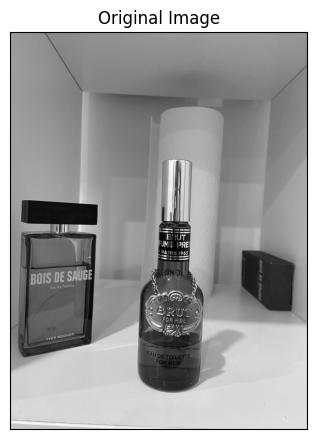

In [64]:
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Simple Thresholding

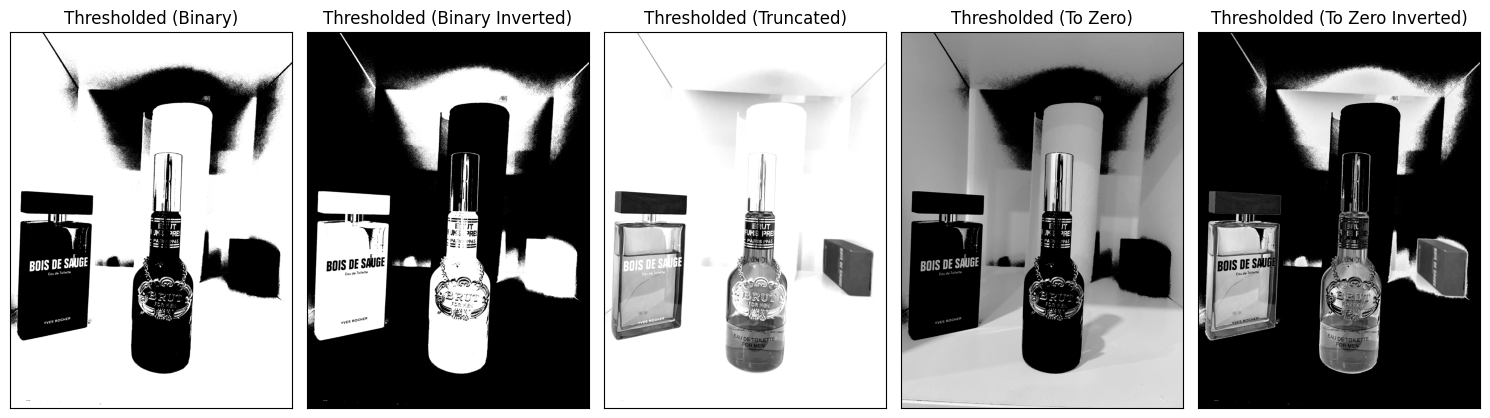

In [65]:
# Thresholding methods
methods = [
    (cv2.THRESH_BINARY, 'Binary'),
    (cv2.THRESH_BINARY_INV, 'Binary Inverted'),
    (cv2.THRESH_TRUNC, 'Truncated'),
    (cv2.THRESH_TOZERO, 'To Zero'),
    (cv2.THRESH_TOZERO_INV, 'To Zero Inverted')
]

# Create a subplot for each thresholding method
plt.figure(figsize=(15, 6))

for i, (method, method_name) in enumerate(methods, start=1):
    # Applying thresholding operation
    ret, thresh_img = cv2.threshold(img, 127, 255, method)

    plt.subplot(1, len(methods), i)
    plt.imshow(thresh_img, 'gray')
    plt.title(f'Thresholded ({method_name})')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# Adaptive Thresholding


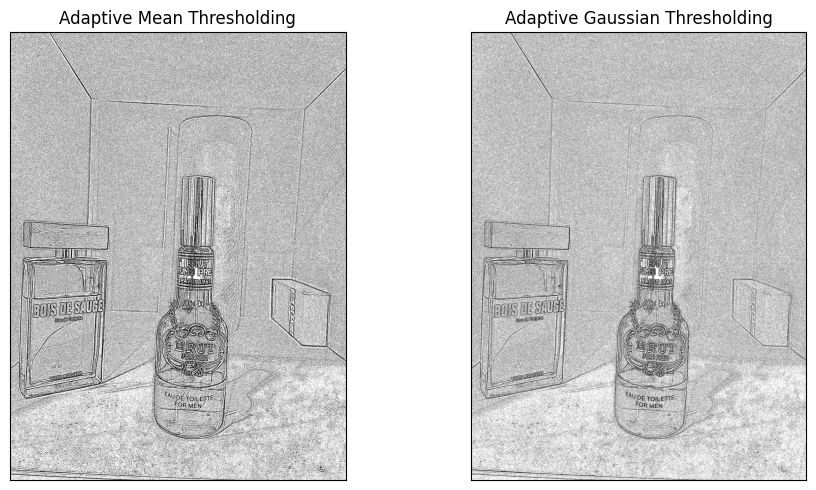

In [74]:
adaptive_m = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_g = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 5))

# Plot Adaptive Mean Thresholding
plt.subplot(1, 2, 1)
plt.imshow(adaptive_m, 'gray')
plt.title('Adaptive Mean Thresholding')
plt.xticks([])
plt.yticks([])

# Plot Adaptive Gaussian Thresholding
plt.subplot(1, 2, 2)
plt.imshow(adaptive_g, 'gray')
plt.title('Adaptive Gaussian Thresholding')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# OTSU Thresholding

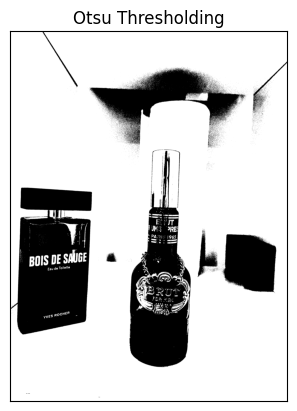

In [75]:
_, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Display the image
plt.imshow(otsu, 'gray')
plt.title("Otsu Thresholding")
plt.xticks([])
plt.yticks([])
plt.show()

# Riddler-Calvard Thresholding

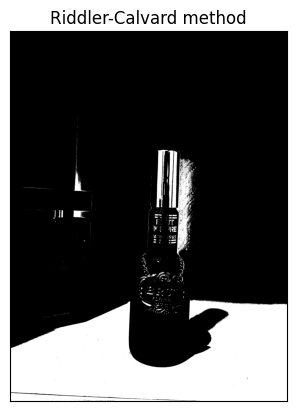

In [76]:
rcv = skimage.filters.threshold_minimum(img)
threshold_rc = image > rcv
# Display the image
plt.imshow(threshold_rc, 'gray')
plt.title("Riddler-Calvard method")
plt.xticks([])
plt.yticks([])
plt.show()